## **A/B Testing of Website Themes to Optimize User Engagement and Conversion**

#### **Context**
 * Analysis of an A/B test conducted to determine the optimal website theme for improving key business metrics.

#### **The Dataset**

The dataset contains 1,000 records of user interactions, with each user randomly assigned to either Light or Dark Theme.

**Data Dictionary:**

| Column | Description | Data Type |
|---|---|---|
| `Theme` | The theme shown to the user (Light or Dark). | `object` |
| `Click Through Rate` | The percentage of users who clicked a key element. | `float64` |
| `Conversion Rate` | The percentage of users who completed a purchase. | `float64` |
| `Bounce Rate` | The percentage of users who left after viewing only one page. | `float64` |
| `Scroll_Depth` | The percentage of the page the user scrolled down. | `float64` |
| `Age` | The age of the user. | `int64` |
| `Location` | The geographical location of the user. | `object` |
| `Session_Duration` | The total time (in seconds) the user spent on the site. | `int64` |
| `Purchases` | Whether the user made a purchase ('Yes' or 'No'). | `object` |
| `Added_to_Cart` | Whether the user added an item to the cart ('Yes' or 'No'). | `object` |


### **2. Exploration & Data loading**

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
# import the data
df = pd.read_csv('website_ab_test.csv')
df.shape

(1000, 10)

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [4]:
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


### **3. Data Cleaning and Preprocessing**

*   **Initial Data Check:**

In [5]:
# looking for null values
print(df.isna().sum())

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64


In [6]:
# column insights
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB
None


In [7]:
# data destriptive stats
df.describe(include='all')

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000,1000
unique,2,NaN,NaN,NaN,NaN,NaN,5,NaN,2,2
top,Dark Theme,NaN,NaN,NaN,NaN,NaN,Chennai,NaN,Yes,Yes
freq,514,NaN,NaN,NaN,NaN,NaN,216,NaN,517,526
mean,NaN,0.256048,0.253312,0.505758,50.319494,41.528000,NaN,924.999000,NaN,NaN
std,NaN,0.139265,0.139092,0.172195,16.895269,14.114334,NaN,508.231723,NaN,NaN
min,NaN,0.010767,0.010881,0.200720,20.011738,18.000000,NaN,38.000000,NaN,NaN
25%,NaN,0.140794,0.131564,0.353609,35.655167,29.000000,NaN,466.500000,NaN,NaN
50%,NaN,0.253715,0.252823,0.514049,51.130712,42.000000,NaN,931.000000,NaN,NaN
75%,NaN,0.370674,0.373040,0.648557,64.666258,54.000000,NaN,1375.250000,NaN,NaN


*   **Data Type Conversion:**
    * The `Purchases` and `Added_to_Cart` columns are `object` type ('Yes'/'No' strings). I converted these to numerical binary format (1 for 'Yes', 0 for 'No') to make them suitable for mathematical and statistical calculations.

In [8]:
df['Purchases'] = df['Purchases'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Added_to_Cart'] = df['Added_to_Cart'].apply(lambda x: 1 if x == 'Yes' else 0)

*   **Feature Engineering**
    * Created an 'Age Group' column by binning the `Age` column

In [9]:
bins = [18, 25, 35, 50, 65]
labels = ['18-25', '26-35', '36-50', '51-65']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

### **4. Exploratory Data Analysis (EDA)**

1.  **Overall Metric Distributions:**

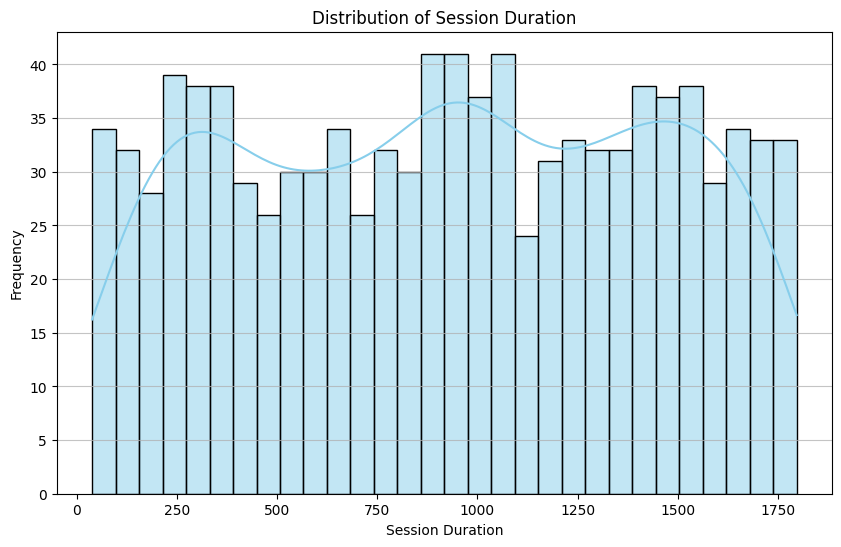

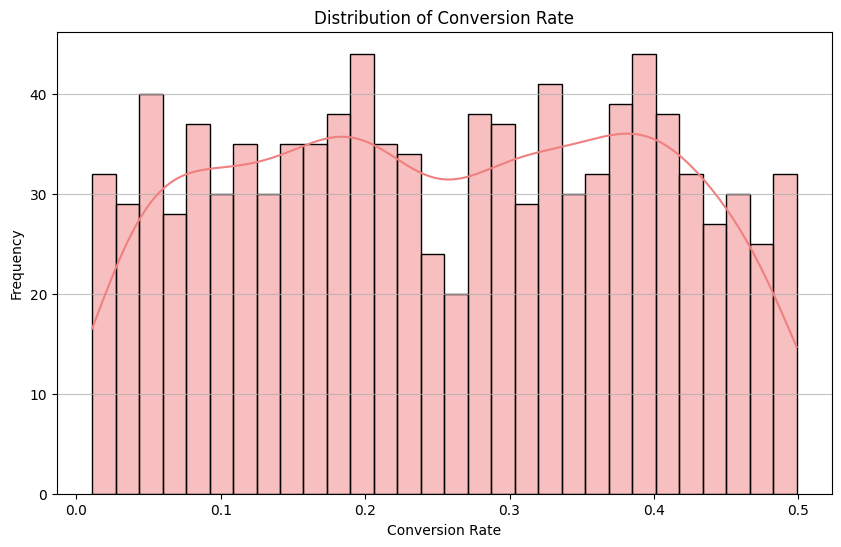

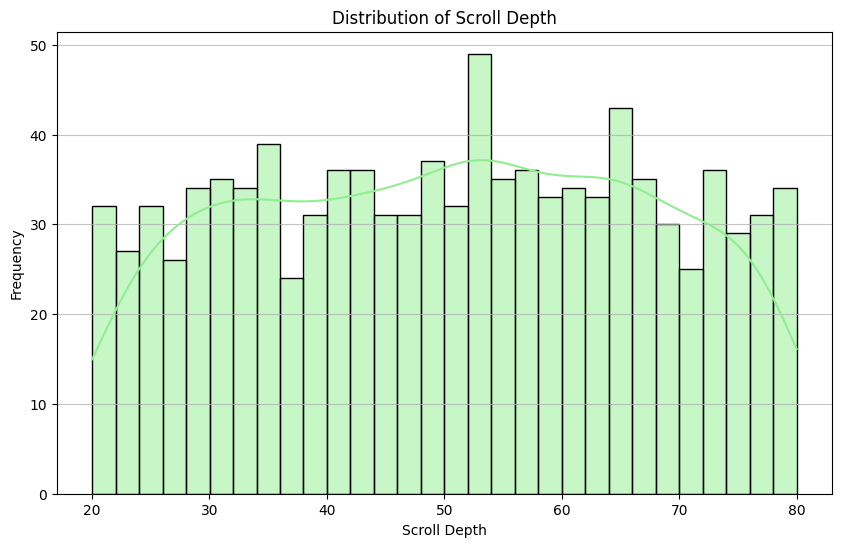

In [10]:
# Matplotlib for Distribution of Session Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Session_Duration'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Matplotlib for Distribution of Conversion Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Conversion Rate'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Matplotlib for Distribution of Scroll Depth
plt.figure(figsize=(10, 6))
sns.histplot(df['Scroll_Depth'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Scroll Depth')
plt.xlabel('Scroll Depth')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

2.  **Comparison of Themes (The Core of EDA):**

  * Comparing the *mean* of `Conversion Rate`, `CTR`, and `Session_Duration` for Theme A vs. Theme B. Plus error bars to give a sense of variance.

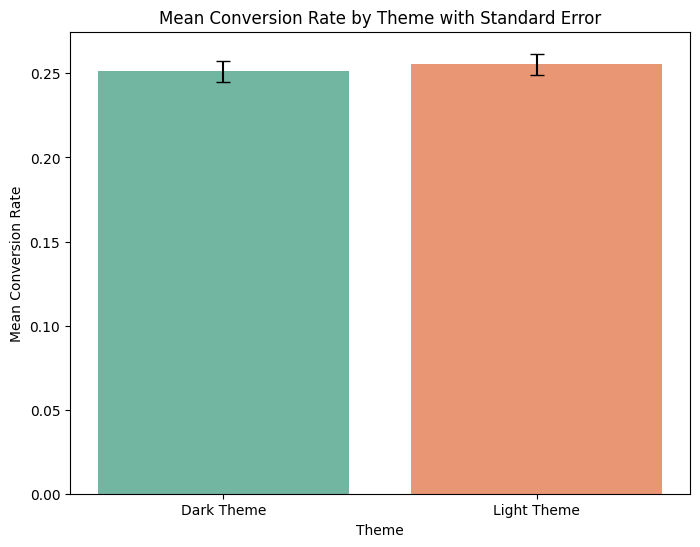

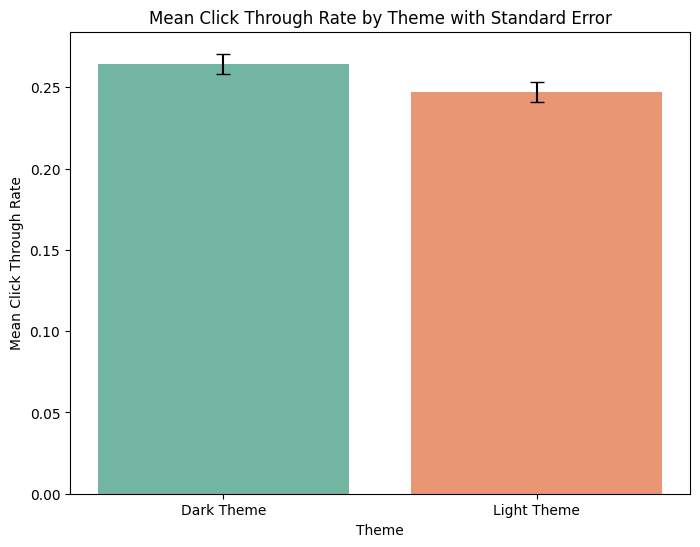

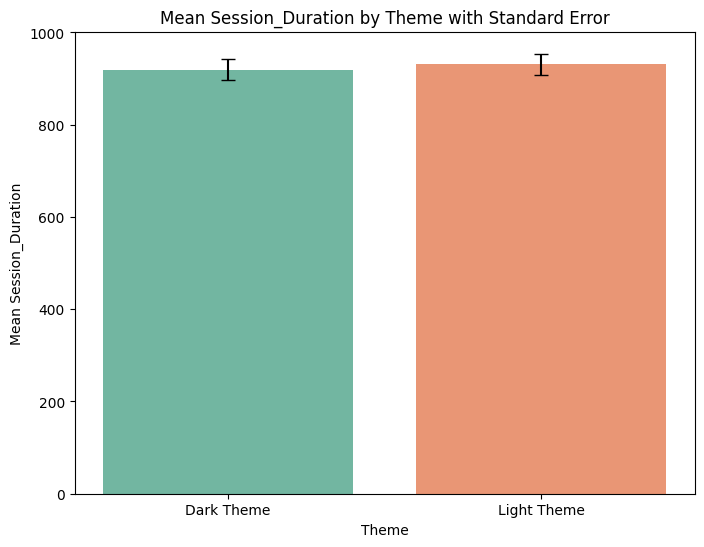

In [11]:
# Melt the dataframe for easier plotting
df_melted = df.melt(
    id_vars=['Theme'],
    value_vars=['Conversion Rate', 'Click Through Rate', 'Session_Duration'],
    var_name='Metric',
    value_name='Value'
)

# Calculate mean and standard error for each metric by theme
summary_df = df_melted.groupby(['Theme', 'Metric'])['Value'].agg(['mean', 'sem']).reset_index()
summary_df.columns = ['Theme', 'Metric', 'Mean', 'SEM']

# Plot each metric separately
for metric_name in ['Conversion Rate', 'Click Through Rate', 'Session_Duration']:
    metric_data = summary_df[summary_df['Metric'] == metric_name]

    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=metric_data,
        x='Theme',
        y='Mean',
        hue='Theme',
        palette='Set2',
        errorbar=None
    )

    # Add error bars manually
    plt.errorbar(
        x=range(len(metric_data['Theme'])),
        y=metric_data['Mean'],
        yerr=metric_data['SEM'],
        fmt='none',
        c='black',
        capsize=5
    )

    plt.title(f'Mean {metric_name} by Theme with Standard Error')
    plt.ylabel(f'Mean {metric_name}')
    plt.xlabel('Theme')
    plt.show()


  * Comparing the *distribution* of `Session_Duration` and `Scroll_Depth` across the two themes.

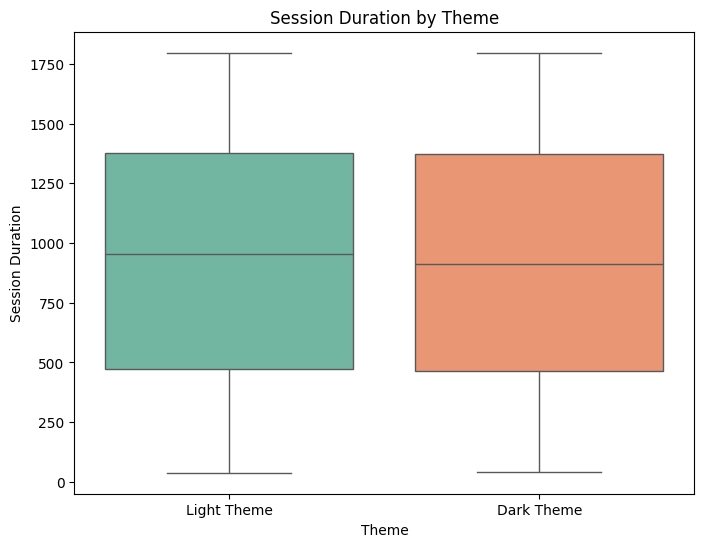

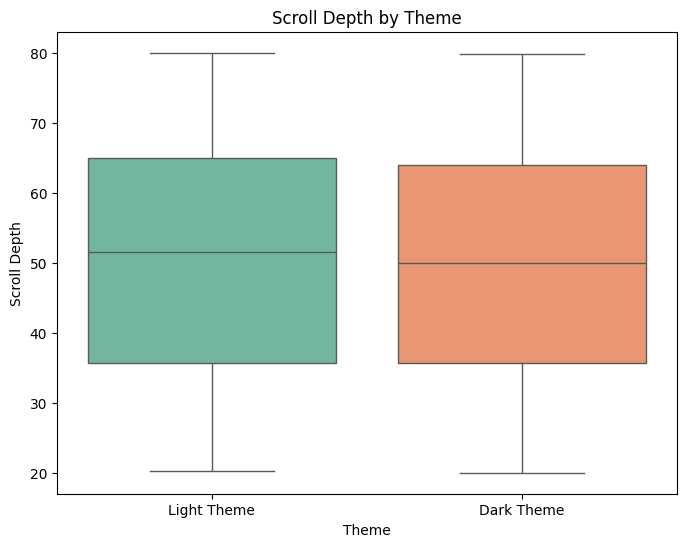

In [12]:
# Box plot for Session Duration
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Theme',
    y='Session_Duration',
    hue='Theme',          # explicitly assign hue
    palette='Set2',
    legend=False          # suppress duplicate legend
)
plt.title('Session Duration by Theme')
plt.ylabel('Session Duration')
plt.xlabel('Theme')
plt.show()

# Box plot for Scroll Depth
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Theme',
    y='Scroll_Depth',
    hue='Theme',          # explicitly assign hue
    palette='Set2',
    legend=False
)
plt.title('Scroll Depth by Theme')
plt.ylabel('Scroll Depth')
plt.xlabel('Theme')
plt.show()

  * Breakdown of `Purchases`

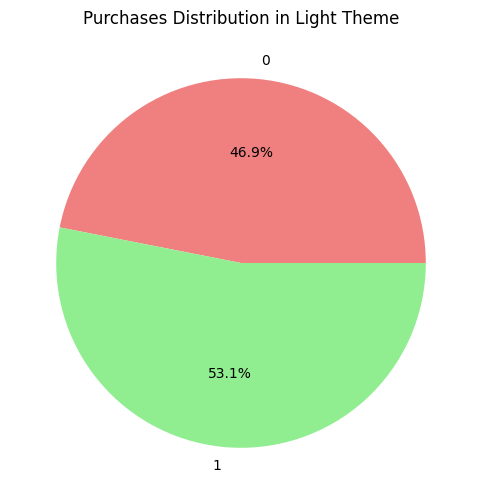

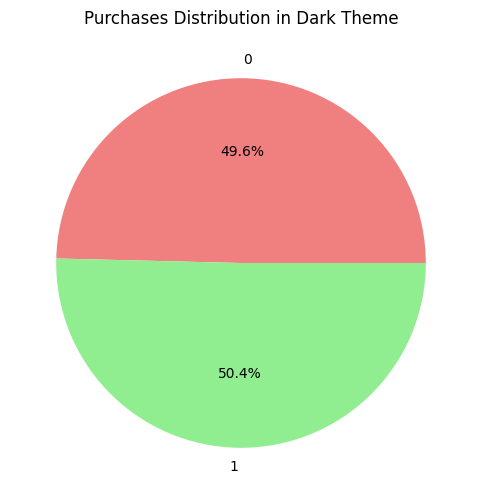

In [13]:
# Group by Theme and Purchases to get counts
purchases_by_theme = df.groupby(['Theme', 'Purchases']).size().reset_index(name='Count')

# Separate Light and Dark Theme data
light_theme_purchases = purchases_by_theme[purchases_by_theme['Theme'] == 'Light Theme']
dark_theme_purchases = purchases_by_theme[purchases_by_theme['Theme'] == 'Dark Theme']

# Pie chart for Light Theme Purchases
plt.figure(figsize=(6, 6))
plt.pie(
    light_theme_purchases['Count'],
    labels=light_theme_purchases['Purchases'],
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightgreen']
)
plt.title('Purchases Distribution in Light Theme')
plt.show()

# Pie chart for Dark Theme Purchases
plt.figure(figsize=(6, 6))
plt.pie(
    dark_theme_purchases['Count'],
    labels=dark_theme_purchases['Purchases'],
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightgreen']
)
plt.title('Purchases Distribution in Dark Theme')
plt.show()


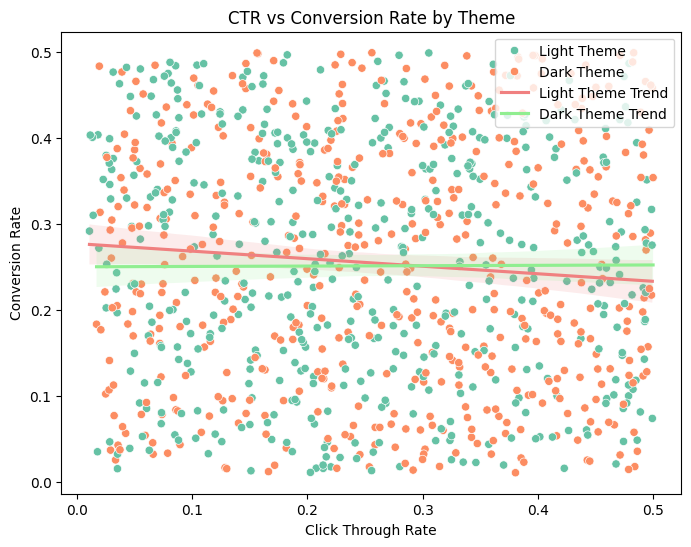

In [14]:
# a look at the relationship between CTR and conversion rate of both themes

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Click Through Rate',
    y='Conversion Rate',
    hue='Theme',          # color by theme
    palette='Set2'
)

# Add regression lines for each theme
sns.regplot(
    data=df[df['Theme'] == 'Light Theme'],
    x='Click Through Rate',
    y='Conversion Rate',
    scatter=False,
    color='lightcoral',
    label='Light Theme Trend'
)

sns.regplot(
    data=df[df['Theme'] == 'Dark Theme'],
    x='Click Through Rate',
    y='Conversion Rate',
    scatter=False,
    color='lightgreen',
    label='Dark Theme Trend'
)

plt.title('CTR vs Conversion Rate by Theme')
plt.xlabel('Click Through Rate')
plt.ylabel('Conversion Rate')
plt.legend()
plt.show()

a look at the histogram of the CTR of both themes:

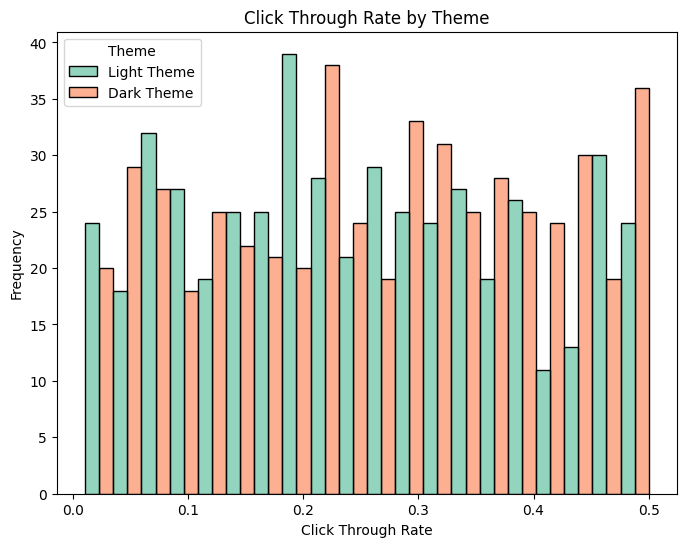

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='Click Through Rate',
    hue='Theme',          # separate by theme
    multiple='dodge',     # side-by-side bars
    palette='Set2',
    alpha=0.7,
    bins=20               # adjust bin count for clarity
)

plt.title('Click Through Rate by Theme')
plt.xlabel('Click Through Rate')
plt.ylabel('Frequency')
plt.show()

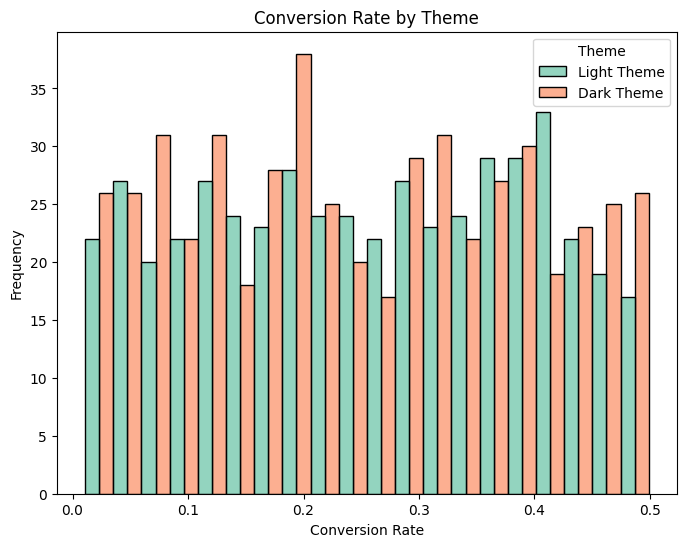

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='Conversion Rate',
    hue='Theme',          # separate Light vs Dark
    multiple='dodge',     # side-by-side bars
    palette='Set2',
    alpha=0.7,
    bins=20               # same as nbinsx=20 in Plotly
)

plt.title('Conversion Rate by Theme')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

### **5. Statistical A/B Testing**

1.  **Conversion Rate & Purchases (Categorical Data):**

In [16]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Theme'], df['Purchases'])
print("Contingency Table (Theme vs. Purchases):\n", contingency_table)

# Perform Chi-Squared Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant association between Theme and Purchases.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant association between Theme and Purchases.")

Contingency Table (Theme vs. Purchases):
 Purchases      0    1
Theme                
Dark Theme   255  259
Light Theme  228  258

Chi-squared statistic: 0.6238119337882984
P-value: 0.4296342647705996
Degrees of freedom: 1
Expected frequencies:
 [[248.262 265.738]
 [234.738 251.262]]
Fail to reject the null hypothesis: There is no statistically significant association between Theme and Purchases.


Based on the Chi-squared test, with a p-value of 0.4296 (which is greater than our significance level of 0.05), we fail to reject the null hypothesis. This means there is no statistically significant association between the website theme (Dark vs. Light) and whether a user makes a purchase. In simpler terms, the choice of theme does not appear to have a statistically significant impact on the likelihood of a purchase in this dataset.

2.  **Session Duration, CTR, Scroll Depth (Continuous Data):**

In [17]:
# Assuming light_theme_data and dark_theme_data are already defined from previous cells
alpha = 0.05

# Extract data for each theme
light_theme_data = df[df['Theme'] == 'Light Theme']
dark_theme_data = df[df['Theme'] == 'Dark Theme']

# --- Session Duration --- #
print("\n--- A/B Testing for Session Duration ---")
tstat_duration, pval_duration = stats.ttest_ind(light_theme_data['Session_Duration'], dark_theme_data['Session_Duration'])
print(f"t-statistic: {tstat_duration:.4f}, p-value: {pval_duration:.4f}")
if pval_duration < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in Session Duration between themes.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in Session Duration between themes.")

# --- Click Through Rate (CTR) --- #
print("\n--- A/B Testing for Click Through Rate ---")
tstat_ctr, pval_ctr = stats.ttest_ind(light_theme_data['Click Through Rate'], dark_theme_data['Click Through Rate'])
print(f"t-statistic: {tstat_ctr:.4f}, p-value: {pval_ctr:.4f}")
if pval_ctr < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in Click Through Rate between themes.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in Click Through Rate between themes.")

# --- Scroll Depth --- #
print("\n--- A/B Testing for Scroll Depth ---")
tstat_scroll, pval_scroll = stats.ttest_ind(light_theme_data['Scroll_Depth'], dark_theme_data['Scroll_Depth'])
print(f"t-statistic: {tstat_scroll:.4f}, p-value: {pval_scroll:.4f}")
if pval_scroll < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in Scroll Depth between themes.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in Scroll Depth between themes.")


--- A/B Testing for Session Duration ---
t-statistic: 0.3528, p-value: 0.7243
Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in Session Duration between themes.

--- A/B Testing for Click Through Rate ---
t-statistic: -1.9767, p-value: 0.0484
Conclusion: Reject the null hypothesis. There is a statistically significant difference in Click Through Rate between themes.

--- A/B Testing for Scroll Depth ---
t-statistic: 0.7565, p-value: 0.4495
Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in Scroll Depth between themes.


Based on the A/B testing results for continuous metrics:

* For Session Duration, with a p-value of 0.7243 (greater than 0.05), we fail to reject the null hypothesis. This indicates there is no statistically significant difference in session duration between the themes.

* For Click Through Rate (CTR), with a p-value of 0.0484 (less than 0.05), we reject the null hypothesis. This suggests a statistically significant difference in Click Through Rate between the themes.

* For Scroll Depth, with a p-value of 0.4495 (greater than 0.05), we fail to reject the null hypothesis. This means there is no statistically significant difference in scroll depth between the themes.